# Keras Regression for Deep Neural Networks with RMSE

Regression results are evaluated differently than classification. 

In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)


# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

#Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate']= zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# convert to numpy - classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values


#Create train/test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu'))#hiddden 1
model.add(Dense(10, activation='relu'))#Hidden 2
model.add(Dense(1)) #output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 1s - loss: 2010.8866 - val_loss: 1802.7440
Epoch 2/1000
1500/1500 - 0s - loss: 1597.7648 - val_loss: 1317.6677
Epoch 3/1000
1500/1500 - 0s - loss: 1017.8826 - val_loss: 679.7655
Epoch 4/1000
1500/1500 - 0s - loss: 452.2210 - val_loss: 286.4659
Epoch 5/1000
1500/1500 - 0s - loss: 256.2901 - val_loss: 237.3503
Epoch 6/1000
1500/1500 - 0s - loss: 230.4887 - val_loss: 217.7062
Epoch 7/1000
1500/1500 - 0s - loss: 210.5674 - val_loss: 198.5883
Epoch 8/1000
1500/1500 - 0s - loss: 189.9249 - val_loss: 179.8521
Epoch 9/1000
1500/1500 - 0s - loss: 170.2025 - val_loss: 161.0175
Epoch 10/1000
1500/1500 - 0s - loss: 151.3657 - val_loss: 143.0504
Epoch 11/1000
1500/1500 - 0s - loss: 132.9143 - val_loss: 126.3411
Epoch 12/1000
1500/1500 - 0s - loss: 115.6466 - val_loss: 110.2652
Epoch 13/1000
1500/1500 - 0s - loss: 100.2352 - val_loss: 96.9171
Epoch 14/1000
1500/1500 - 0s - loss: 87.3523 - val_loss: 84.9053
Epoch 15/1000
1500/150

1500/1500 - 0s - loss: 0.6012 - val_loss: 0.7530
Epoch 129/1000
1500/1500 - 0s - loss: 0.5993 - val_loss: 0.8310
Epoch 130/1000
1500/1500 - 0s - loss: 0.5953 - val_loss: 0.7474
Epoch 131/1000
1500/1500 - 0s - loss: 0.5709 - val_loss: 0.7346
Epoch 132/1000
1500/1500 - 0s - loss: 0.5719 - val_loss: 0.7564
Epoch 133/1000
1500/1500 - 0s - loss: 0.5732 - val_loss: 0.7931
Epoch 134/1000
1500/1500 - 0s - loss: 0.5699 - val_loss: 0.7525
Epoch 135/1000
1500/1500 - 0s - loss: 0.5838 - val_loss: 0.7118
Epoch 136/1000
1500/1500 - 0s - loss: 0.5582 - val_loss: 0.7698
Epoch 137/1000
1500/1500 - 0s - loss: 0.5592 - val_loss: 0.7142
Epoch 138/1000
1500/1500 - 0s - loss: 0.5430 - val_loss: 0.7489
Epoch 139/1000
1500/1500 - 0s - loss: 0.5843 - val_loss: 0.7447
Epoch 140/1000
Restoring model weights from the end of the best epoch.
1500/1500 - 0s - loss: 0.5539 - val_loss: 0.7872
Epoch 00140: early stopping



### Mean Square Error
The mean square error is the sum of the squared differences between the prediction ($\hat{y}$) and the expected ($y$). MSE values are not of a particular unit. If an MSE value has decreased for a model, that is good. However, beyond this, there is not much more you can determine. Low MSE values are desired.

$ \mbox{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $

In [3]:
from sklearn import metrics

#Predict
pred = model.predict(x_test)

# Measure error
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.7118074220791459



### Root Mean Square Error
The root mean square (RMSE) is essentially the square root of the MSE. Because of this, the RMSE error is in the same units as the training data outcome. Low RMSE values are desired.

$ \mbox{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [4]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


Final score (RMSE): 0.8436868033098218


### Lift Chart
To generate a lift chart, perform the following activities:

* Sort the data by expected output. Plot the blue line above.
* For every point on the x-axis plot the predicted value for that same data point. This is the green line above.
* The x-axis is just 0 to 100% of the dataset. The expected always starts low and ends high.
* The y-axis is ranged according to the values predicted.

Reading a lift chart:

* The expected and predict lines should be close. Notice where one is above the ot other.
* The below chart is the most accurate on lower age.

In [5]:
# Regression Chart
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


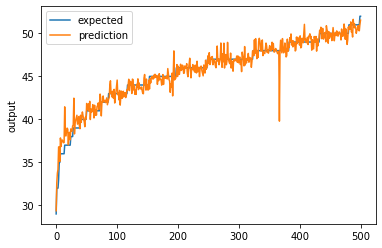

In [6]:
# plot the chart
chart_regression(pred.flatten(),y_test)